## Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics

In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.linear_model import LinearRegression,Lasso,LassoCV,Ridge,RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")

In [3]:
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


Showing top 5 rows

In [4]:
data.shape

(30, 17)

data has only 30 no. of records and 17 columns.

In [5]:
data.isna().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

Dataset has no null values.

In [6]:
data.columns.tolist()

['W',
 'R',
 'AB',
 'H',
 '2B',
 '3B',
 'HR',
 'BB',
 'SO',
 'SB',
 'RA',
 'ER',
 'ERA',
 'CG',
 'SHO',
 'SV',
 'E']

1. W – Win: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work (also related: winning percentage)

2. R – Runs scored: times reached home plate legally and safely

3. AB:: – At bat: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction

4. H – Hit: reaching base because of a batted, fair ball without error by the defense

5. 2B – Double: hits on which the batter reaches second base safely without the contribution of a fielding error

6. 3B – Triple: hits on which the batter reaches third base safely without the contribution of a fielding error
    
7. HR – Home runs: hits on which the batter successfully touched all four bases, without the contribution of a fielding error

8. BB – Base on balls (also called a "walk"): hitter not swinging at four pitches called out of the strike zone and awarded first base.

9. SO - number of times a batter strikes out to their plate appearance

10. SB – Stolen base: number of bases advanced by the runner while the ball is in the possession of the defense

11. RA – Run average: number of runs allowed times nine divided by innings pitched
    
12. ER – Earned run: number of runs that did not occur as a result of errors or passed balls
    
13. ERA – Earned run average: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched.
    
14. CG – Complete game: number of games where player was the only pitcher for their team
    
15. SHO – Shutout: number of complete games pitched with no runs allowed
    
16. SV – Save: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings
    
17. E – Errors: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
W      30 non-null int64
R      30 non-null int64
AB     30 non-null int64
H      30 non-null int64
2B     30 non-null int64
3B     30 non-null int64
HR     30 non-null int64
BB     30 non-null int64
SO     30 non-null int64
SB     30 non-null int64
RA     30 non-null int64
ER     30 non-null int64
ERA    30 non-null float64
CG     30 non-null int64
SHO    30 non-null int64
SV     30 non-null int64
E      30 non-null int64
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


there 30 no. of non-null records that are of integer and float dtypes.

## EDA

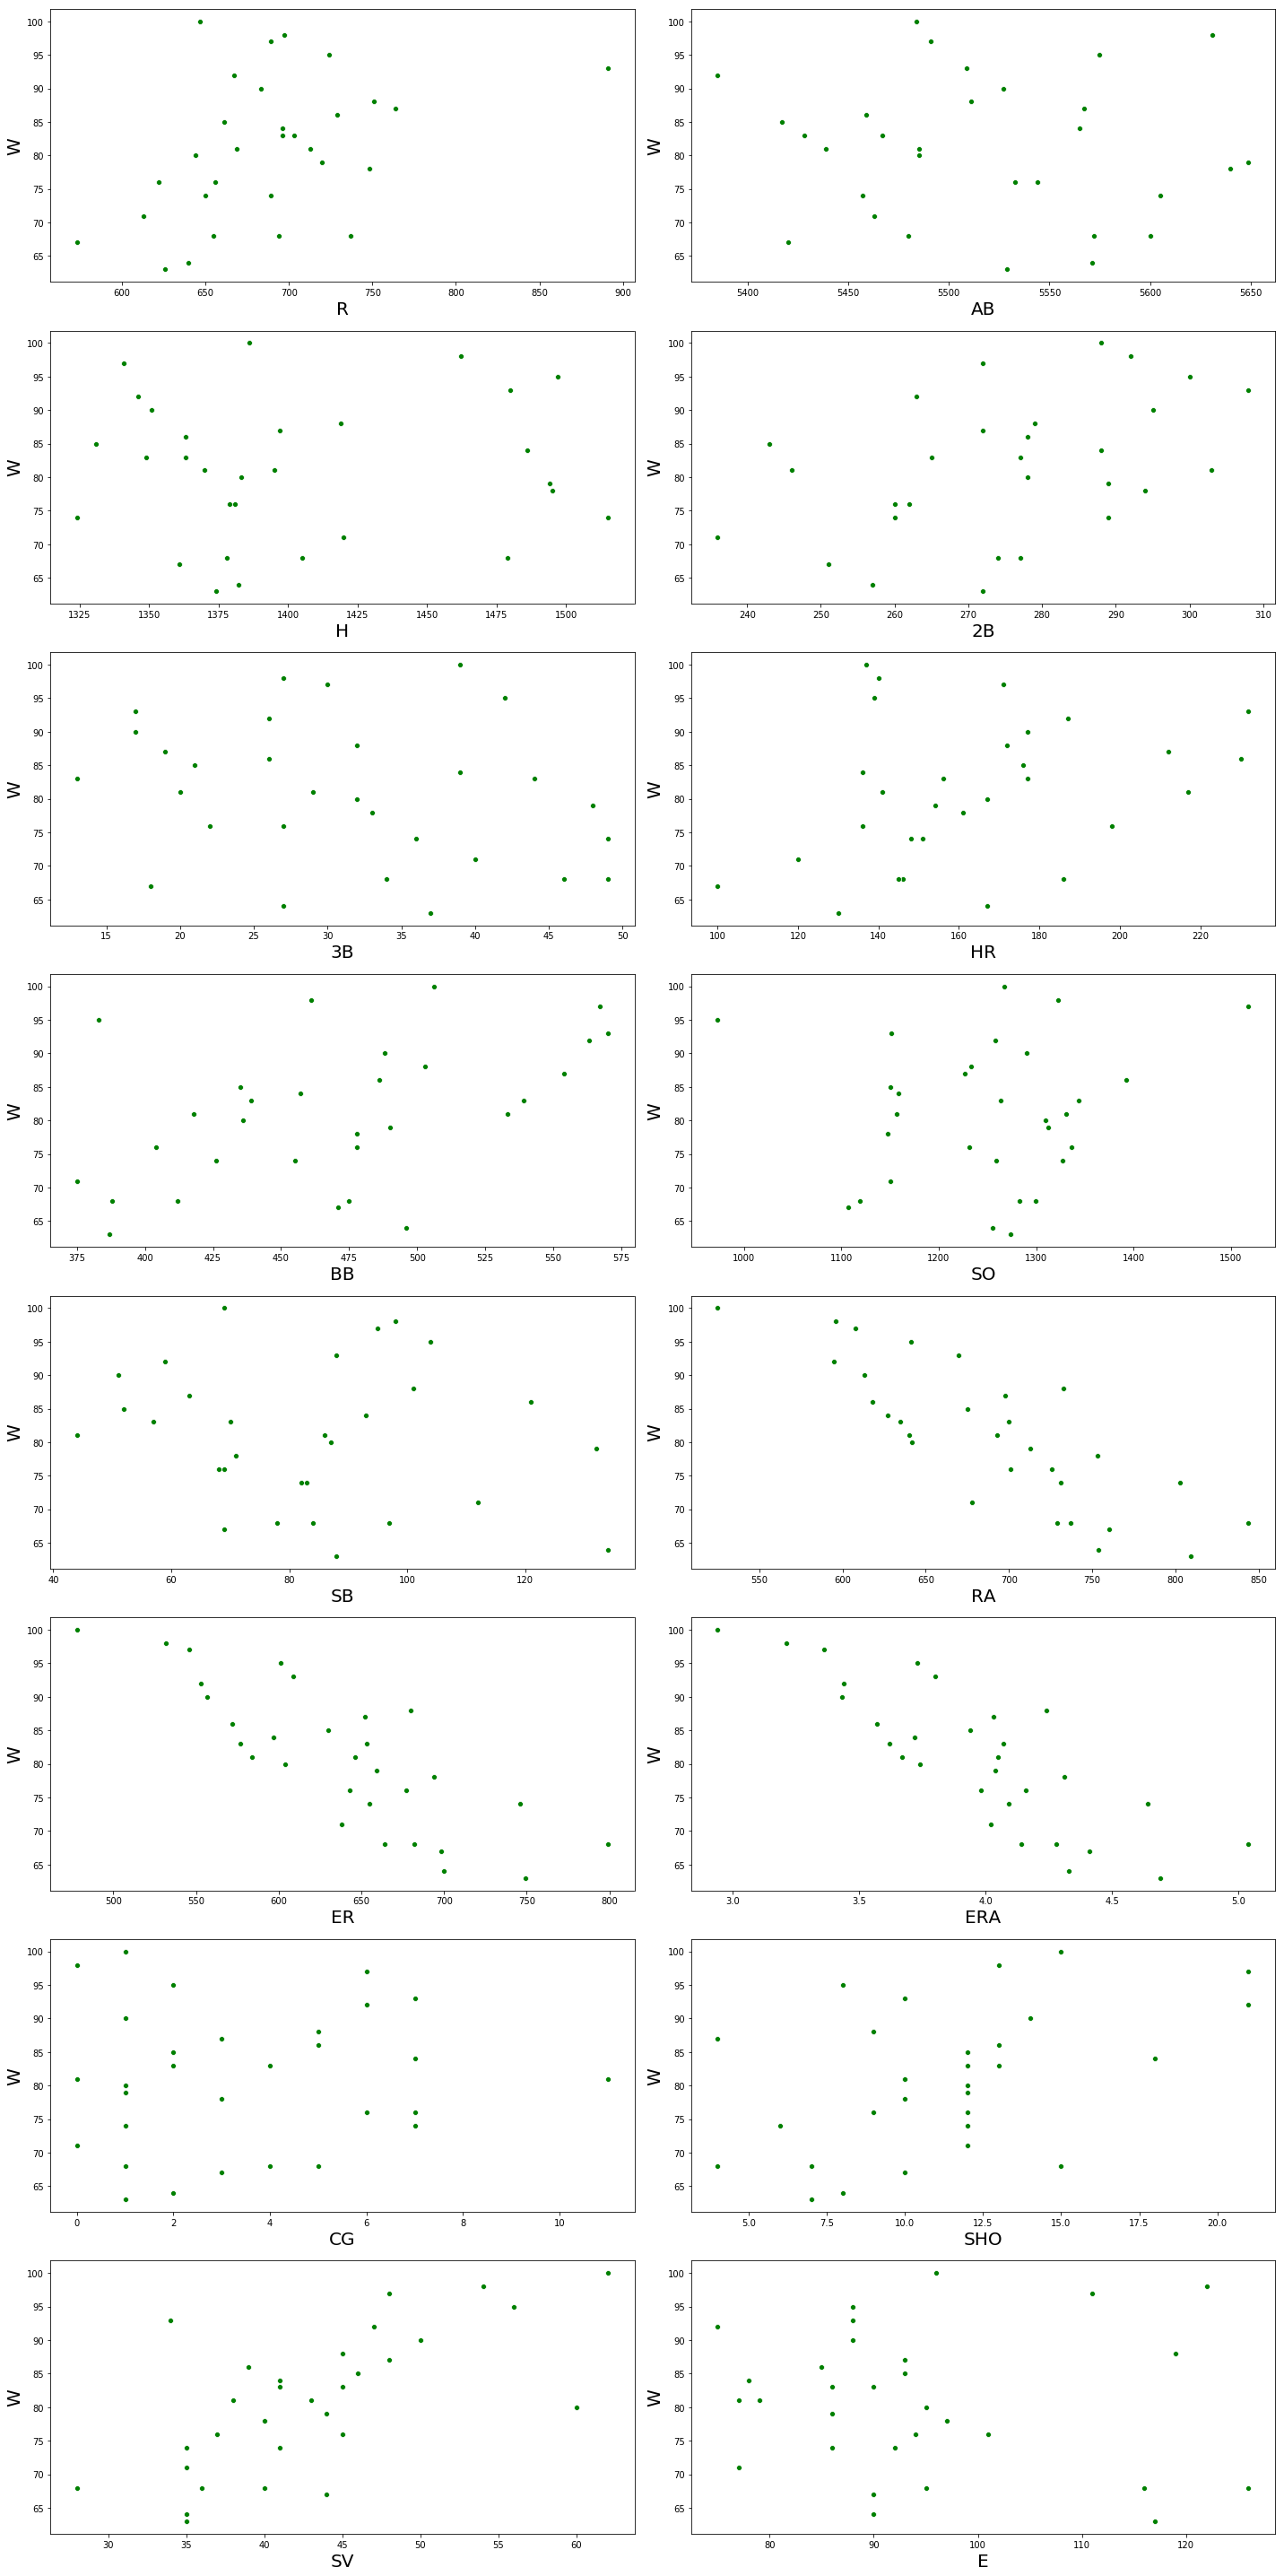

In [8]:
plt.figure(figsize=(20,40))
graph=1
for col in data.iloc[:,1:]:
    if graph<18:
    
        plt.subplot(8,2,graph)
        sns.scatterplot(data[col],data['W'],color='green')
        plt.xlabel(col,fontsize='20')
        plt.ylabel("W",fontsize='20')
    graph+=1
plt.tight_layout()

Graph 1: It seems like there is linear relation between the output variable and R i.e. Runs Scored.
    
Graph 2: There seems to be no such relation between the wins % and the balll at bat.

Graph 3: There seems to be no such relation between the wins % and the balll hitted.

Graph 4: It seems like there is linear relation between the output variable and 2B i.e. Runs Scored doubled.

Graph 5: It seems like there is some linear relation between the output variable and 3B i.e. Runs Scored tripled.

Graph 6: It seems like there is linear relation between the output variable and HR i.e. Home Runs Scored.

Graph 7: It seems like there is linear relation between the output variable and BB i.e. Base on balls means more the team comfortable to make runs runs by walk chances of that teams are high to win.

Graph 8: It seems like there is some linear relation between the output variable and SO i.e. striked out.

Graph 9: It seems like there is linear relation between the output variable and SB i.e. Stolen base. if higher the no. of bases advanced by ruuner lower the winning percentage.

Graph 10: It seems like there is linear relation between the output variable and RA i.e. Runs Average that means higher the no. runs allowed lower the % of winning.

Graph 11: It seems like there is linear relation between the output variable and ER i.e. Earned Runs that if higher no. of runs that are not occured lower the % of winning.

Graph 12: It seems like there is linear relation between the output variable and ERA i.e. Earned Runs average that if higher ERA  lower the % of winning.

Graph 13: There seems to be no such relation between the wins % and the complete game.

Graph 14: There seems to be relation between the wins % and the SHO.

Graph 15: It seems like there is linear relation between the output variable and SV.

Graph 16: It seems like there is no such linear relation or maybe between the output variable and E i.e. Errors occured by the players.

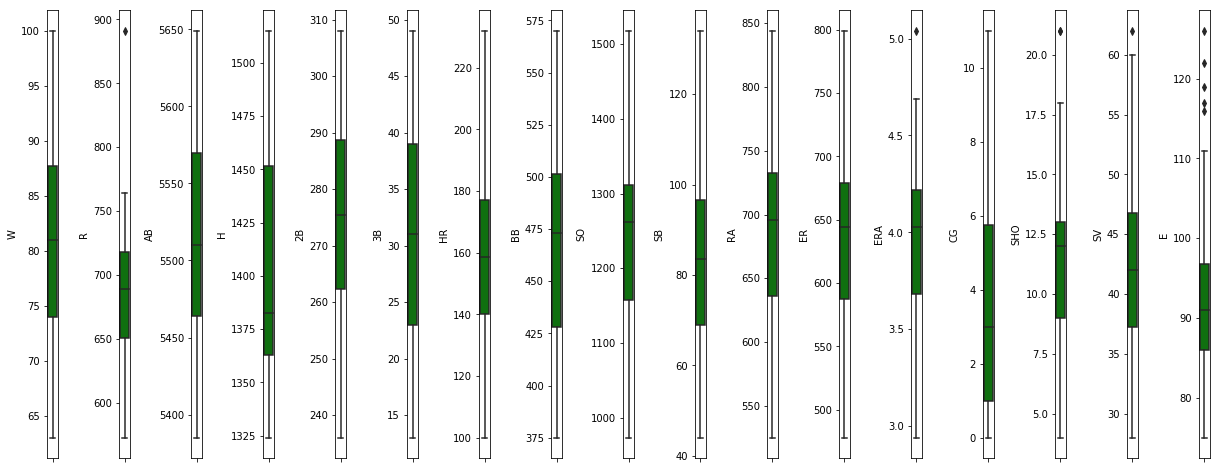

In [9]:
collist=data.columns.values
ncol=30
nrow=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(data[collist[i]],orient='v',color='green')
    plt.tight_layout()

There seems to be like some outliers in R,error(E),ERA,SHO,SV columns. But these are real value so we can't remove these outliers as these can be pratically possible.

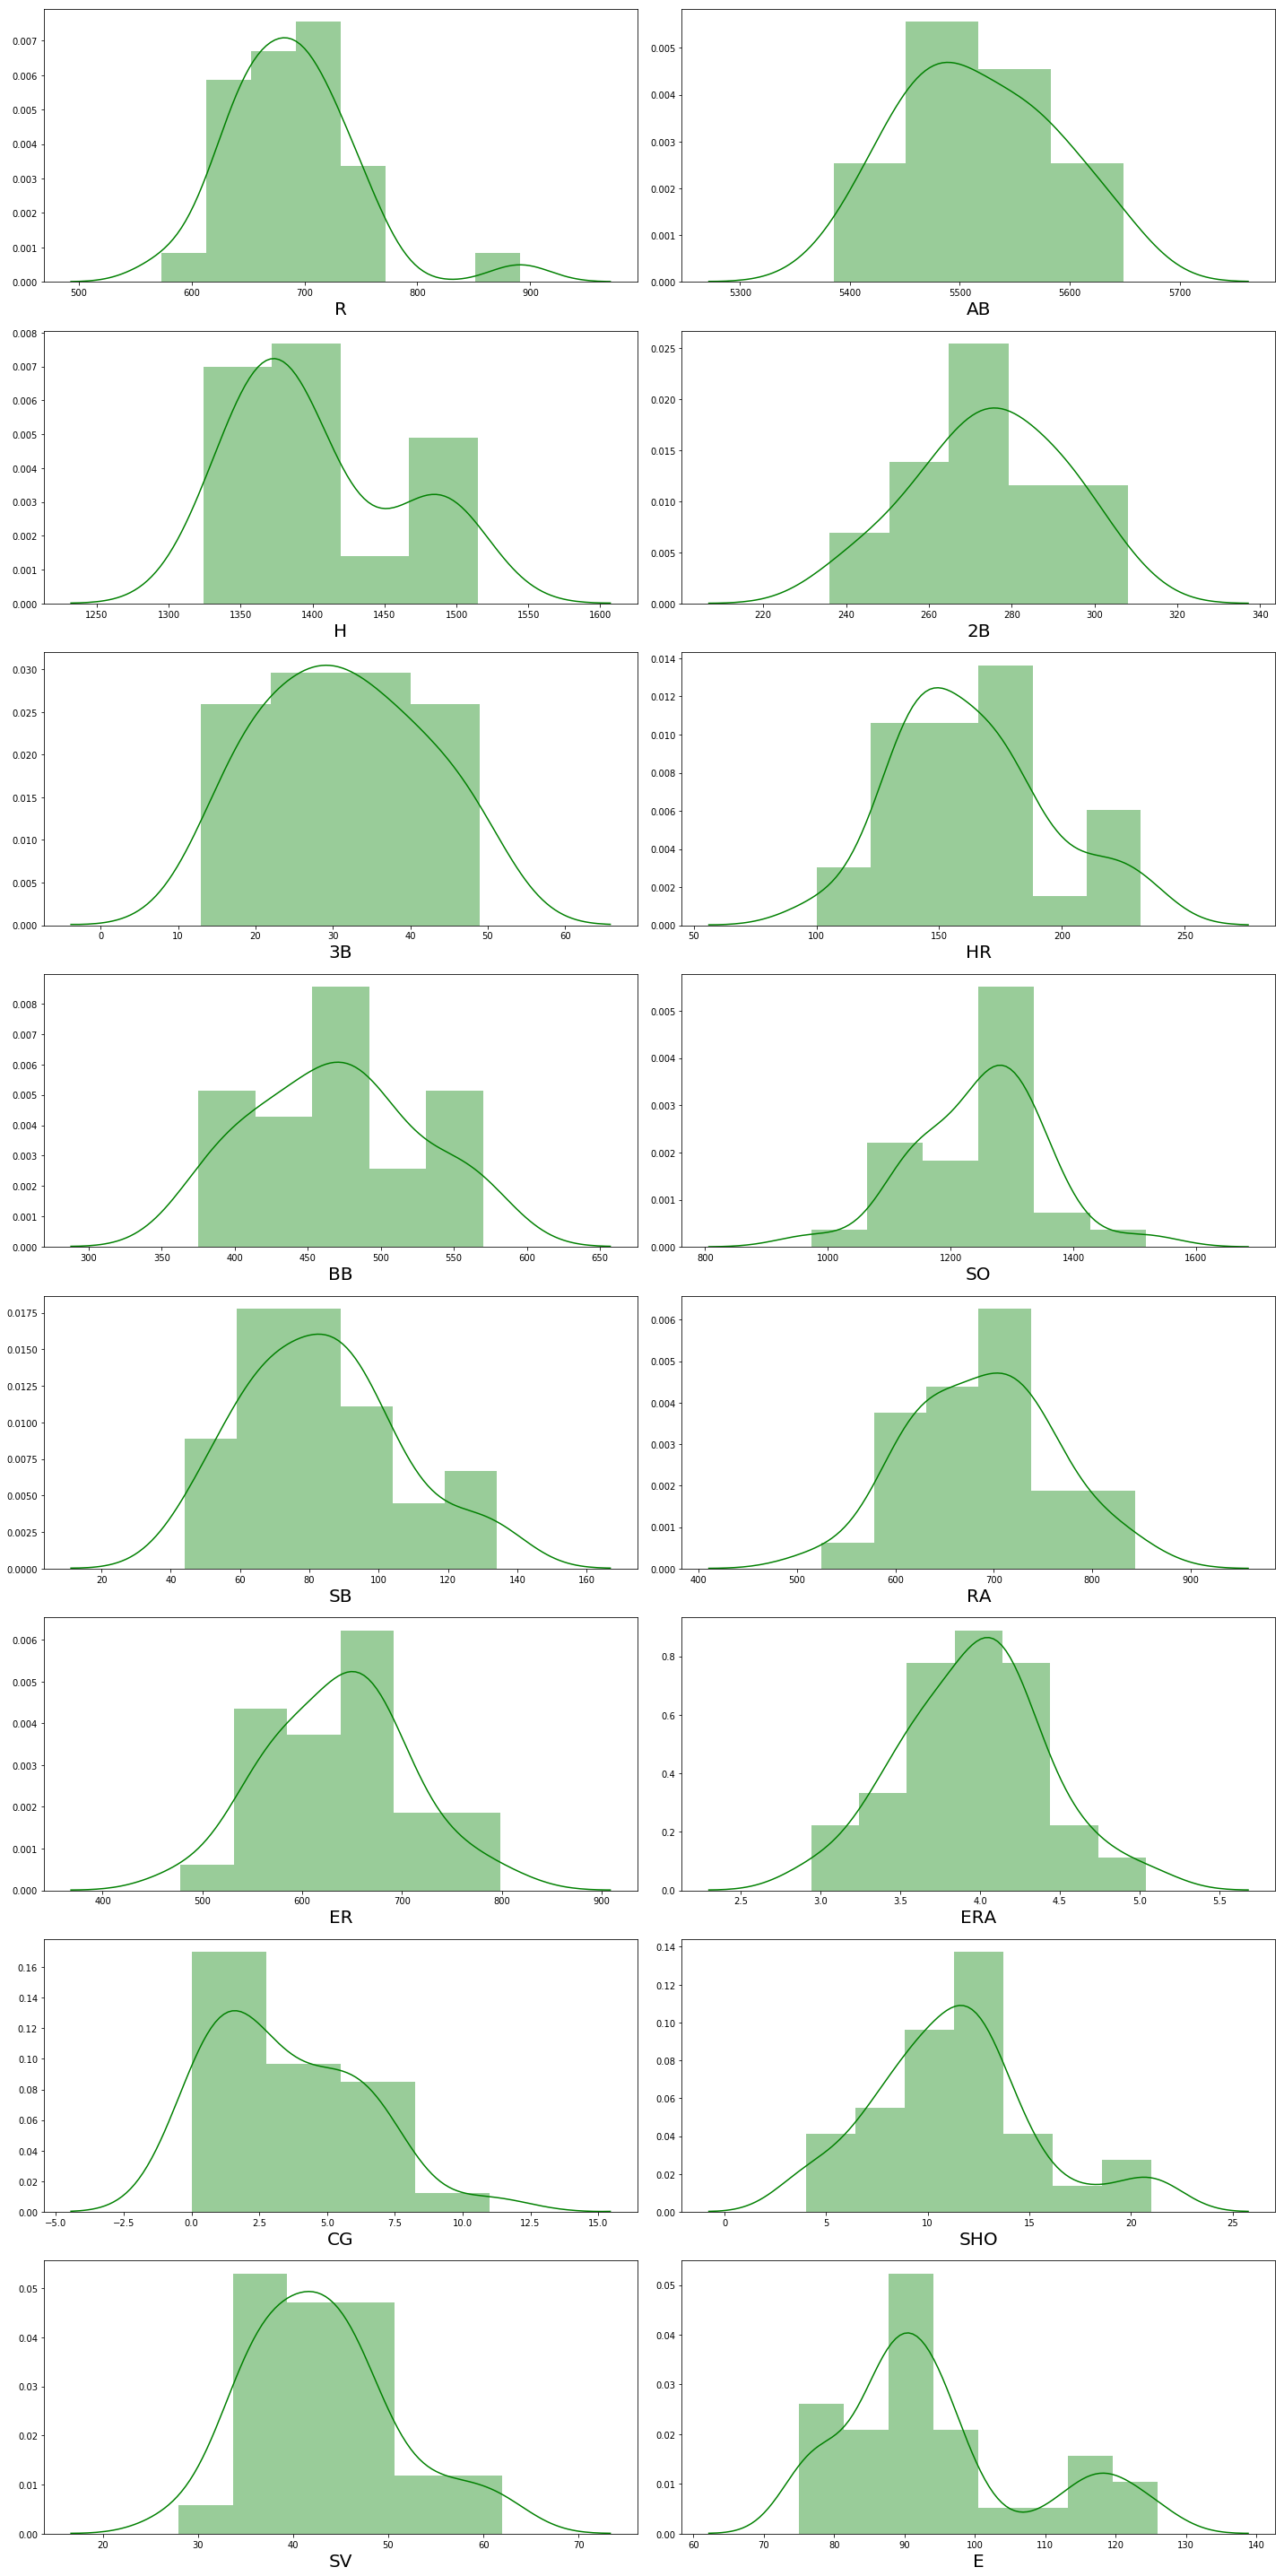

In [10]:
plt.figure(figsize=(20,40))
graph=1
for col in data.iloc[:,1:]:
    if graph<17:
    
        plt.subplot(8,2,graph)
        sns.distplot(data[col],color='green')
        plt.xlabel(col,fontsize=20)
    graph+=1
plt.tight_layout()

Graph no. 1,13,16 that R, CG,E these columns doesn't seems to be normally distributed.

In [11]:
data.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

R,H,HR,ER,ERA,CG,SV,SHO,E these columns has value that are not in range 0.5 to -0.5,,So there is skewness in this columns.

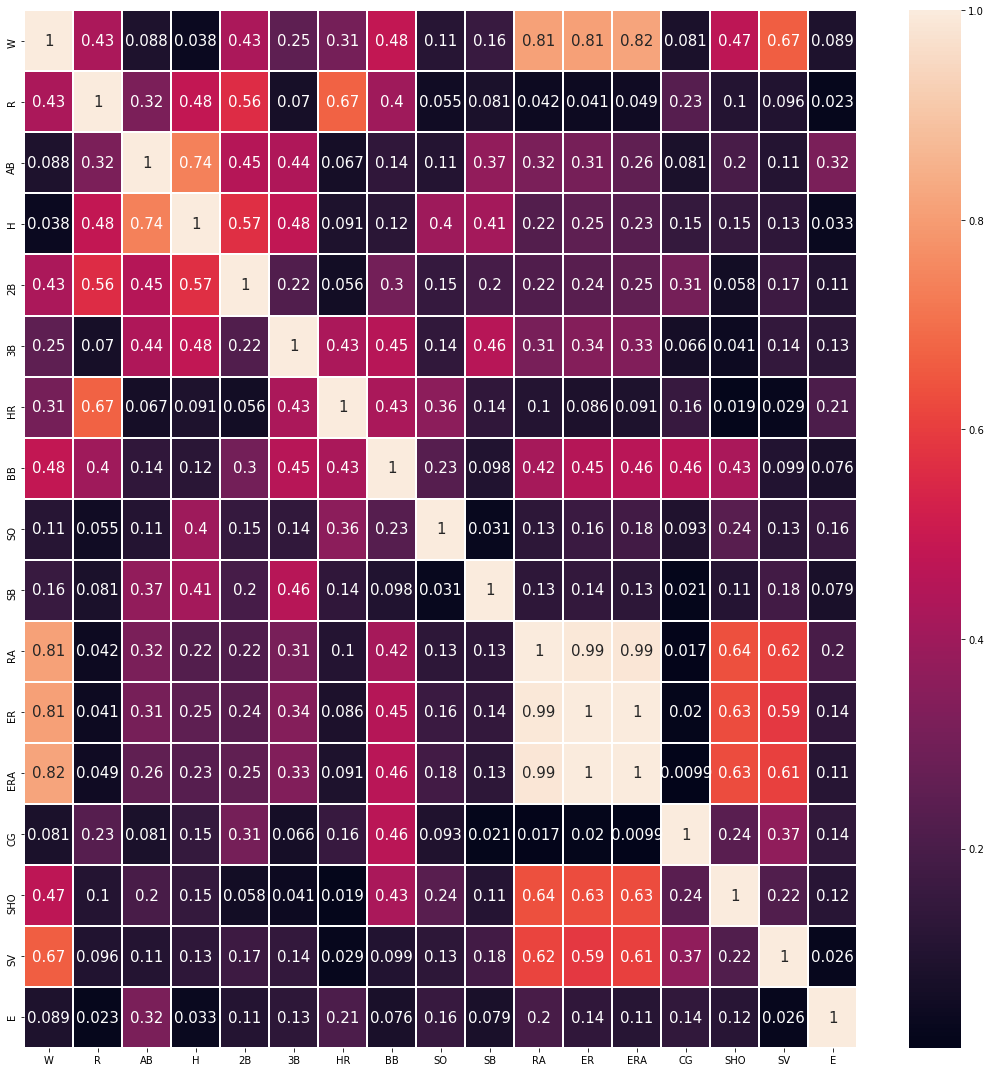

In [12]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr().abs(),annot=True,annot_kws={"size":15},linewidths=True)
plt.tight_layout()

from the above we get to know that there are some columns like ER,ERA, RA are having colinearity and also wiinings are mostly dependent on these columns . so, we have to remove such columns and keep the best among them.

H & AB are also having collinearity among them. and also these columns contribute 3.8% 8.8% to predict the wiining.

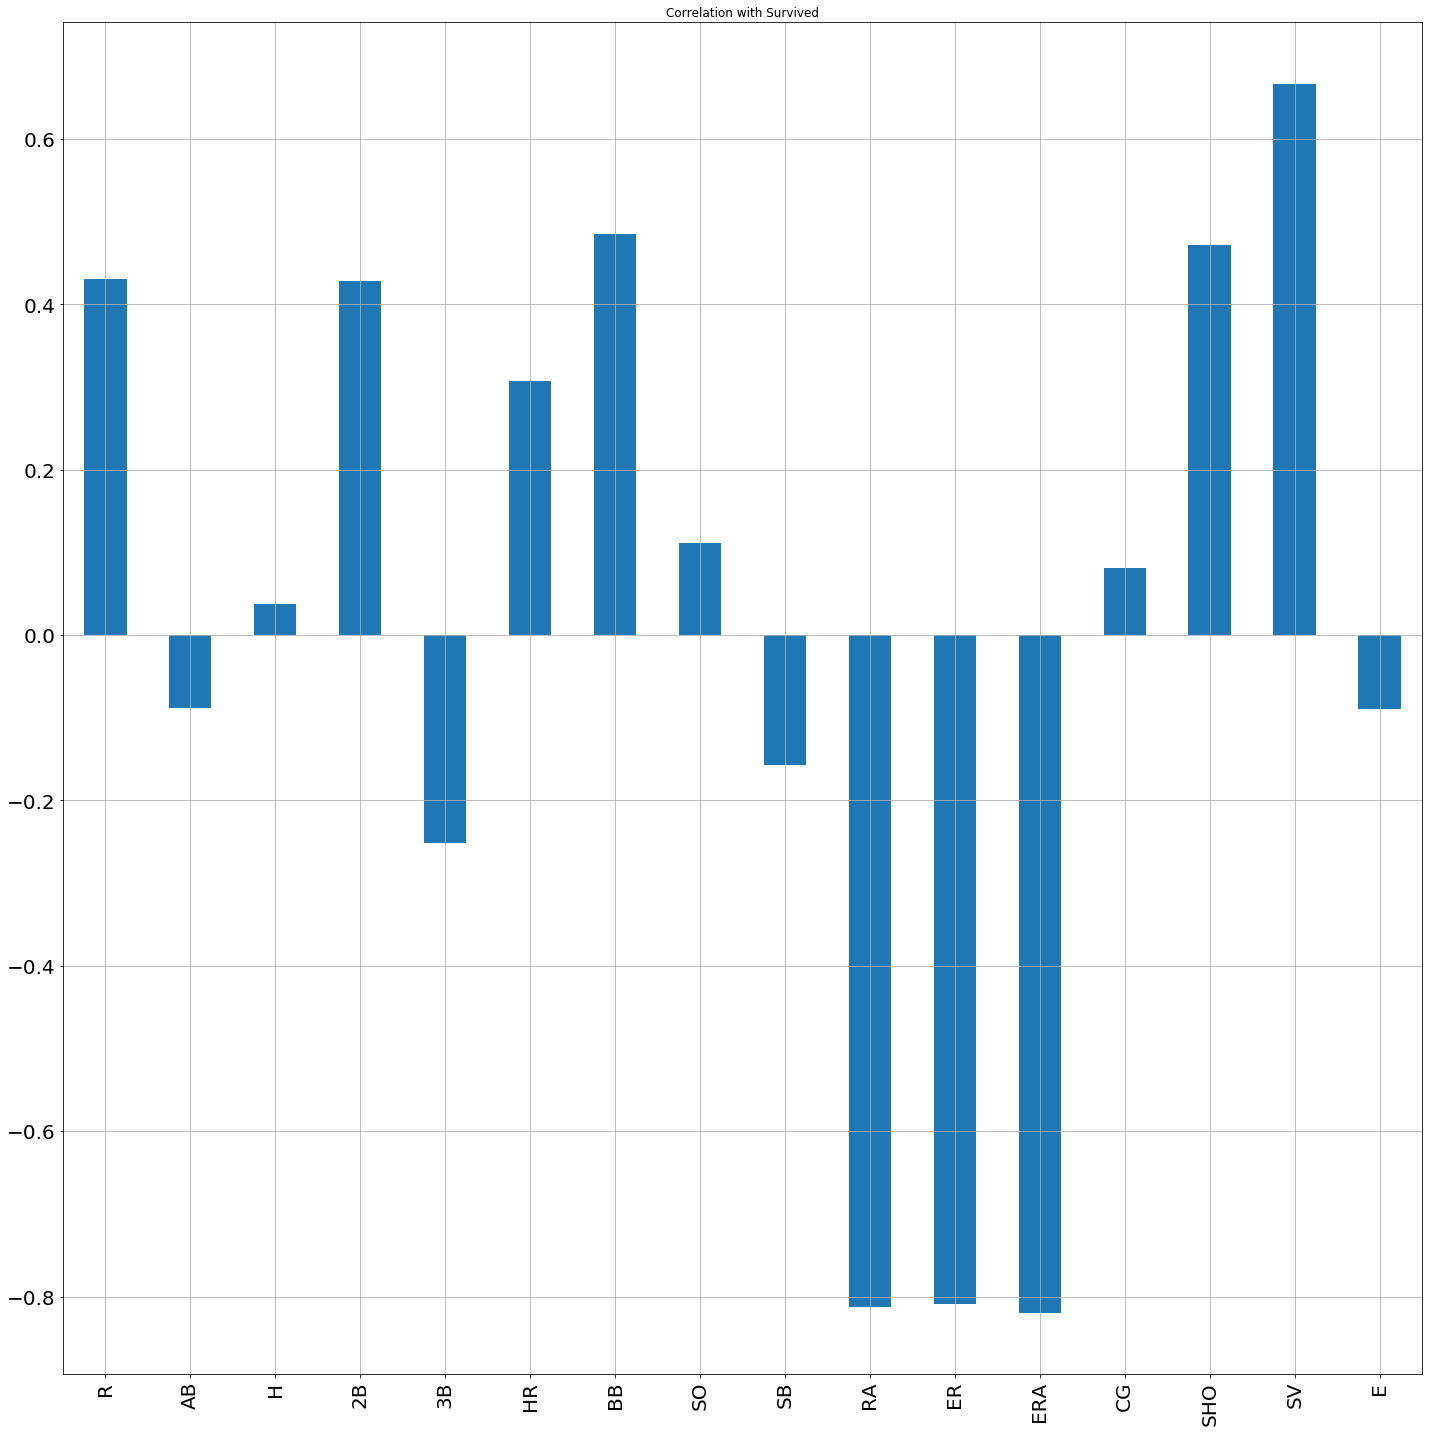

In [13]:
data.drop("W",axis=1).corrwith(data.W).plot(kind='bar',grid=True,figsize=(20,20),title='Correlation with Survived',fontsize=20)
plt.tight_layout()

In [14]:
data['twoB'],data['threeB']=data['2B'],data['3B']

In [15]:
data.drop(columns=['2B','3B'],axis=1,inplace=True)

In [16]:
import statsmodels.formula.api as smf
lm=smf.ols(formula='W~R+AB+H+twoB+threeB+HR+BB+SO+SB+RA+ER+ERA+CG+SHO+SV+E',data=data).fit()

lm.rsquared_adj

0.8878504174857915

Here we get 0.88 r-squared value after taking all columns

In [17]:
lm=smf.ols(formula='W~R+twoB+threeB+HR+BB+SO+SB+ERA+CG+SHO+SV',data=data).fit()

lm.rsquared_adj

0.9087621701741668

Here we get 0.90 r-squared value after removing ER, RA, H, E, AB columns

In [18]:
data.shape

(30, 17)

### Data Cleaning

In [19]:
data.drop_duplicates(inplace=True)

removing duplicates if any axists.

In [20]:
data.drop(columns=["ER","RA","H","E",'AB'],axis=1,inplace=True)

Removed columns thas contributes less dependecty to target variable or has multi-colinearity. tHAT we analyse from th EDA part.

In [21]:
data.shape

(30, 12)

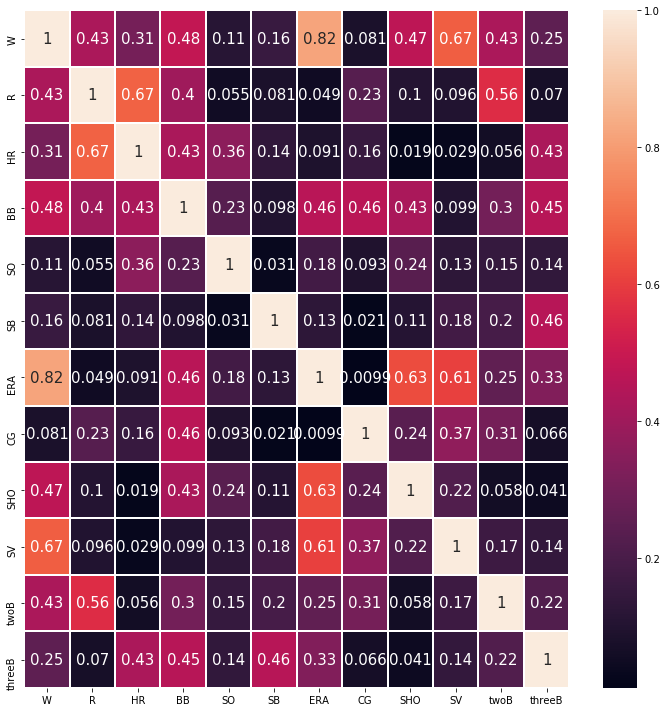

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr().abs(),annot=True,annot_kws={"size":15},linewidths=True)
plt.tight_layout()

after removing the columns there is no multi-colinearity. 

#### Decreasing Skewness

In [23]:
data.describe()

,W,R,HR,BB,SO,SB,ERA,CG,SHO,SV,twoB,threeB
count,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,163.633333,469.100000,1248.20000,83.500000,3.956333,3.466667,11.300000,43.066667,274.733333,31.300000
std,10.453455,58.761754,31.823309,57.053725,103.75947,22.815225,0.454089,2.763473,4.120177,7.869335,18.095405,10.452355
min,63.000000,573.000000,100.000000,375.000000,973.00000,44.000000,2.940000,0.000000,4.000000,28.000000,236.000000,13.000000
25%,74.000000,651.250000,140.250000,428.250000,1157.50000,69.000000,3.682500,1.000000,9.000000,37.250000,262.250000,23.000000
50%,81.000000,689.000000,158.500000,473.000000,1261.50000,83.500000,4.025000,3.000000,12.000000,42.000000,275.500000,31.000000
75%,87.750000,718.250000,177.000000,501.250000,1311.50000,96.500000,4.220000,5.750000,13.000000,46.750000,288.750000,39.000000
max,100.000000,891.000000,232.000000,570.000000,1518.00000,134.000000,5.040000,11.000000,21.000000,62.000000,308.000000,49.000000


in this there is  0 value in our dataset in CG column so we use yeo-johnson method to decrease the skewness or distribute more normally.

In [24]:
features=['HR','SV','CG','ERA','SHO']
from sklearn.preprocessing import PowerTransformer
scalar=PowerTransformer(method='yeo-johnson')
data[features]=scalar.fit_transform(data[features].values)
data[features].head()

,HR,SV,CG,ERA,SHO
0,-0.764626,1.546378,-0.359844,-0.500893,-0.789579
1,-0.158581,0.360444,-0.359844,0.261806,0.251775
2,-0.689676,-0.607594,1.993513,-0.636459,-0.245393
3,-0.879049,-0.764453,1.220103,0.060804,-0.510759
4,-0.329850,-1.095010,1.220103,1.520959,0.251775


In [25]:
data.R=np.log(data.R)

Here we use log function to reduce skewness from R column.

In [26]:
data.head()

,W,R,HR,BB,SO,SB,ERA,CG,SHO,SV,twoB,threeB
0,95,6.584791,-0.764626,383,973,104,-0.500893,-0.359844,-0.789579,1.546378,300,42
1,83,6.545350,-0.158581,439,1264,70,0.261806,-0.359844,0.251775,0.360444,277,44
2,81,6.505784,-0.689676,533,1157,86,-0.636459,1.993513,-0.245393,-0.607594,303,29
3,76,6.432940,-0.879049,404,1231,68,0.060804,1.220103,-0.510759,-0.764453,260,27
4,74,6.535241,-0.329850,455,1259,83,1.520959,1.220103,0.251775,-1.095010,289,49


In [27]:
data.describe()

,W,R,HR,BB,SO,SB,ERA,CG,SHO,SV,twoB,threeB
count,30.000000,30.000000,3.000000e+01,30.000000,30.00000,30.000000,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,30.000000,30.000000
mean,80.966667,6.530765,7.179442e-16,469.100000,1248.20000,83.500000,-1.302662e-15,4.107825e-16,5.477100e-16,6.339373e-15,274.733333,31.300000
std,10.453455,0.082584,1.017095e+00,57.053725,103.75947,22.815225,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,18.095405,10.452355
min,63.000000,6.350886,-2.485131e+00,375.000000,973.00000,44.000000,-2.311585e+00,-1.729889e+00,-2.099326e+00,-2.473461e+00,236.000000,13.000000
25%,74.000000,6.478888,-7.176843e-01,428.250000,1157.50000,69.000000,-6.082114e-01,-9.091805e-01,-5.107593e-01,-7.252384e-01,262.250000,23.000000
50%,81.000000,6.535241,-7.558883e-02,473.000000,1261.50000,83.500000,1.613822e-01,6.463007e-02,2.517754e-01,-3.115649e-02,275.500000,31.000000
75%,87.750000,6.576809,5.065887e-01,501.250000,1311.50000,96.500000,5.953974e-01,9.155165e-01,4.861603e-01,5.723372e-01,288.750000,39.000000
max,100.000000,6.792344,1.937860e+00,570.000000,1518.00000,134.000000,2.391324e+00,1.993513e+00,2.122859e+00,2.073674e+00,308.000000,49.000000


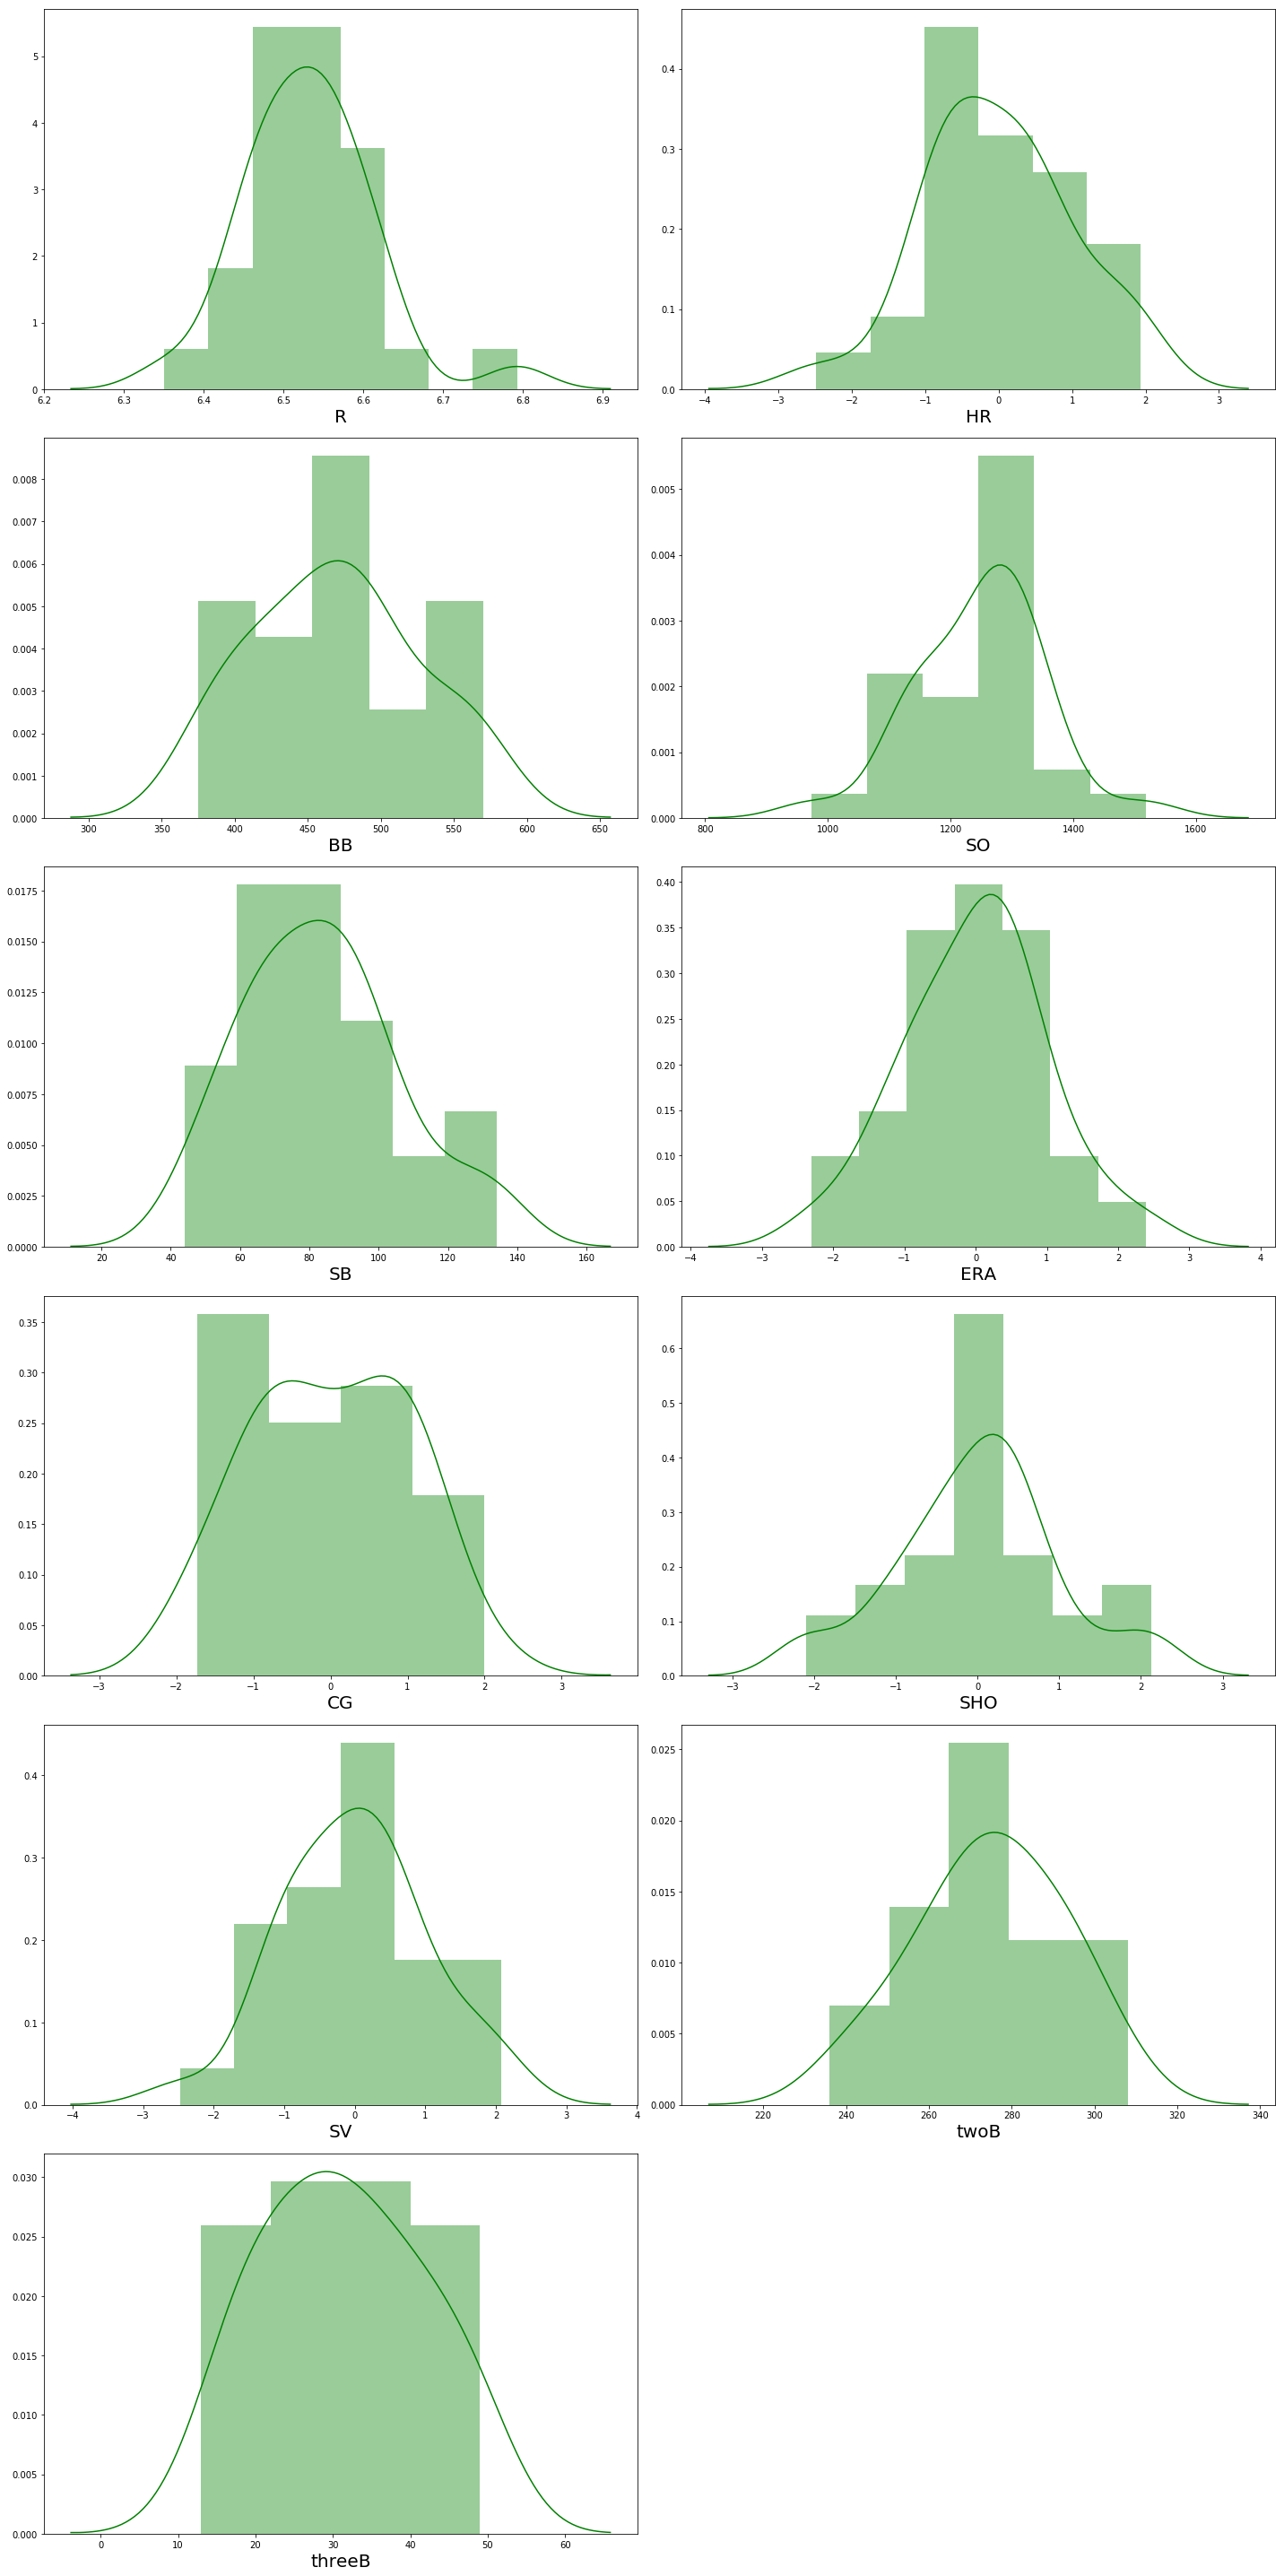

In [28]:
plt.figure(figsize=(20,40))
graph=1
for col in data.iloc[:,1:]:
    if graph<12:
    
        plt.subplot(6,2,graph)
        sns.distplot(data[col],color='green')
        plt.xlabel(col,fontsize=20)
    graph+=1
plt.tight_layout()

All columns seems to be normally distributed

In [29]:
data.skew()

W         0.047089
R         0.744196
HR       -0.000065
BB        0.158498
SO       -0.156065
SB        0.479893
ERA       0.001746
CG       -0.059785
SHO       0.006560
SV        0.000836
twoB     -0.230650
threeB    0.129502
dtype: float64

Only in Runs column there is some skewness otherwise all other columns has no skewness.

In [30]:
data.shape

(30, 12)

#### Data Loss

In [31]:
print("Loss of data is: 0%")

Loss of data is: 0%


## Model Deployment

In [32]:
X=data.drop(columns=['W'],axis=1)
Y=data['W']

split data into features & labels.

### Normalizing the data

In [33]:
scalar=StandardScaler()

X_=scalar.fit_transform(X)

X_

array([[ 0.66538462, -0.76462586, -1.53490242, -2.69762957,  0.91388329,
        -0.50089346, -0.35984364, -0.78957937,  1.546378  ,  1.42017307,
         1.04119304],
       [ 0.17962404, -0.15858141, -0.5365919 ,  0.15487844, -0.60182558,
         0.26180619, -0.35984364,  0.25177537,  0.36044386,  0.12740339,
         1.23580856],
       [-0.30766209, -0.68967629,  1.13914361, -0.89398189,  0.11144918,
        -0.63645949,  1.99351257, -0.24539345, -0.6075936 ,  1.58879521,
        -0.22380785],
       [-1.20480139, -0.8790486 , -1.16053598, -0.16860185, -0.69098493,
         0.06080381,  1.22010317, -0.51075929, -0.76445333, -0.82812203,
        -0.41842337],
       [ 0.05513009, -0.3298501 , -0.25136033,  0.10586628, -0.02228984,
         1.52095856,  1.22010317,  0.25177537, -1.09501024,  0.80189192,
         1.72234737],
       [ 3.22158785,  1.93785984,  1.79874163, -0.95279649,  0.20060853,
        -0.34310973,  1.22010317, -0.24539345, -1.26943834,  1.86983209,
        -1.391

In [34]:
Linear=LinearRegression()
DecisionTree=DecisionTreeRegressor()
knn=KNeighborsRegressor()
RandomForest=RandomForestRegressor()
AdaBoost=AdaBoostRegressor()
xgb_=xgb.XGBRegressor()

In [35]:
algo=[Linear,DecisionTree,RandomForest,knn,AdaBoost,xgb_]

In [36]:
model_acc_rs={}
maximum_acc=[]
for model in algo:
    max_accuracy=0
    for i in range(1,150):
        X_train,X_test,Y_train,Y_test=train_test_split(X_,Y,test_size=0.2,random_state=i)
        model.fit(X_train,Y_train)
        Y_pred=model.predict(X_test)
        accuracy=r2_score(Y_test,Y_pred)*100
        if accuracy>max_accuracy:
            max_accuracy=accuracy
            rs=i
            mae=mean_absolute_error(Y_test,Y_pred)
            mse=mean_squared_error(Y_test,Y_pred)
            rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
    maximum_acc.append(max_accuracy)
    model_acc_rs[model]=[max_accuracy,rs]
    print(f"\n\n{model}:\n---------------------------\n---------------------------\n")
    print(f"The highest accuracy is {max_accuracy} of model {model} at random state {rs}")


    print("\nMEAN ABSOLUTE ERROR:",mae)

    print(f"\nMEAN SQUARED ERROR for the model:",mse)
    
    print(f"\nROOT MEAN SQUARED ERROR for the model:",rmse)



LinearRegression():
---------------------------
---------------------------

The highest accuracy is 96.84750948015497 of model LinearRegression() at random state 116

MEAN ABSOLUTE ERROR: 1.9574227718262804

MEAN SQUARED ERROR for the model: 5.240139797431289

ROOT MEAN SQUARED ERROR for the model: 2.2891351636439663


DecisionTreeRegressor():
---------------------------
---------------------------

The highest accuracy is 73.14487632508833 of model DecisionTreeRegressor() at random state 136

MEAN ABSOLUTE ERROR: 4.333333333333333

MEAN SQUARED ERROR for the model: 25.333333333333332

ROOT MEAN SQUARED ERROR for the model: 5.033222956847166


RandomForestRegressor():
---------------------------
---------------------------

The highest accuracy is 85.2440635217188 of model RandomForestRegressor() at random state 93

MEAN ABSOLUTE ERROR: 2.6116666666666695

MEAN SQUARED ERROR for the model: 8.77568333333335

ROOT MEAN SQUARED ERROR for the model: 2.96237798623561


KNeighborsRegresso

In [37]:
CVmodel={}

for model in algo:
    CVscore_={}
    print(f"\n{model}")
    print("-"*25)
    print("\n")
    for i in range(2,20):
        cvS=cross_val_score(model,X_,Y,cv=i)
        CVscore_[i]=cvS.mean()
        print(f"Mean CV Score of model {model}:: {cvS.mean()} at k-fold::{i}\n")
    CVdata=pd.DataFrame(CVscore_,index=[""])
    CVmodel[str(model)]=CVdata.max(axis=1).tolist()


LinearRegression()
-------------------------


Mean CV Score of model LinearRegression():: -0.13528709240460102 at k-fold::2

Mean CV Score of model LinearRegression():: 0.657958253530288 at k-fold::3

Mean CV Score of model LinearRegression():: 0.8428383655513503 at k-fold::4

Mean CV Score of model LinearRegression():: 0.6601461492778424 at k-fold::5

Mean CV Score of model LinearRegression():: 0.7201229041998157 at k-fold::6

Mean CV Score of model LinearRegression():: 0.6823160502174522 at k-fold::7

Mean CV Score of model LinearRegression():: 0.7129916254293452 at k-fold::8

Mean CV Score of model LinearRegression():: -2.216473590169708 at k-fold::9

Mean CV Score of model LinearRegression():: -2.018378597726645 at k-fold::10

Mean CV Score of model LinearRegression():: -2.1273737313589467 at k-fold::11

Mean CV Score of model LinearRegression():: -2.1875704916195806 at k-fold::12

Mean CV Score of model LinearRegression():: -10.710640825543482 at k-fold::13

Mean CV Score of mod

Mean CV Score of model XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None):: 0.37240113131786384 at k-fold::3

Mean CV Score of model XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_de

Mean CV Score of model XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None):: -80.45465350844627 at k-fold::15

Mean CV Score of model XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_de

In [38]:
CVmodel

{'LinearRegression()': [0.8428383655513503],
 'DecisionTreeRegressor()': [-0.21856490535821052],
 'RandomForestRegressor()': [0.4266146391666508],
 'KNeighborsRegressor()': [0.4419880340349333],
 'AdaBoostRegressor()': [0.41595463135997407],
 "XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,\n             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,\n             gamma=0, gpu_id=-1, importance_type=None,\n             interaction_constraints='', learning_rate=0.300000012,\n             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,\n             monotone_constraints='()', n_estimators=100, n_jobs=4,\n             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,\n             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',\n             validate_parameters=1, verbosity=None)": [0.37240113131786384]}

Showing maximun cvScore for each model.

In [40]:


m=list(CVmodel.keys())

print("The least difference between the accuracy and CV score of each model is::\n")
for i in range(6):
    print(f"{m[i]}::{round(np.abs(CVmodel[m[i]][0]*100-maximum_acc[i]),2)}")

The least difference between the accuracy and CV score of each model is::

LinearRegression()::12.56
DecisionTreeRegressor()::95.0
RandomForestRegressor()::42.58
KNeighborsRegressor()::39.96
AdaBoostRegressor()::44.23
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)::44.1


here for model LinearRegression we get the least value i.e. the difference between the accuracy and cvScore of this model is 12.56 .

In [41]:
X_train,X_test,Y_train,Y_test=train_test_split(X_,Y,test_size=0.2,random_state=116)

here we take RandonState 116 because it is the best to use for LinearRegressor.

## Plotting regplot graph for LinearRegressor model

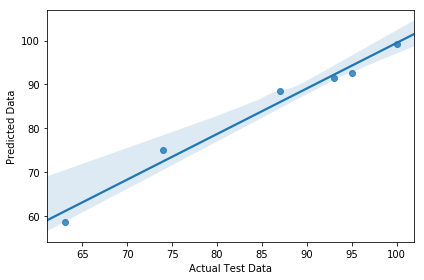

In [42]:
Linear.fit(X_train,Y_train)
Y_pred=Linear.predict(X_test)
sns.regplot(Y_test,Y_pred)
plt.xlabel("Actual Test Data")
plt.ylabel("Predicted Data")
plt.tight_layout()

Here we analyse that the data points are very close to the best fit line. That means the residual is less.

## Regularization

In [43]:
lasso=Lasso()
parameters={"alpha":np.arange(0.0001,0.1,0.001),'normalize':[True,False],'max_iter':[1000,1500,2000]}
grid=GridSearchCV(lasso,parameters)
grid.fit(X_train,Y_train)
grid.best_params_

{'alpha': 0.0821, 'max_iter': 1000, 'normalize': True}

Here we get the best paameter for Lasso. So, that we can see our model is overfitted/underfitted or not.

In [44]:
lasso=Lasso(alpha= 0.0001, max_iter= 1000, normalize=False)
lasso.fit(X_train,Y_train)
pred=lasso.predict(X_test)
r2_score(Y_test,pred)*100

96.84815932852734

Here we can see that our model is not overfitted or underfitted as the r2 scoe Lasso model are  similiar with LinearREgrssion  model r2_score that is 96.84.

## Hyper parameter Tuning

In [45]:
LinearRegression()

LinearRegression()

In [46]:
params={"normalize":[True,False],"n_jobs":[-1,1,None],"copy_X":[True,False],"positive":[True ,False]}

In [47]:
grid=GridSearchCV(Linear,param_grid=params)
grid.fit(X_train,Y_train)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'copy_X': [True, False], 'n_jobs': [-1, 1, None],
                         'normalize': [True, False],
                         'positive': [True, False]})

In [48]:
grid.best_params_

{'copy_X': True, 'n_jobs': -1, 'normalize': False, 'positive': False}

In [49]:
Linear=LinearRegression(copy_X=True,n_jobs=-1,normalize=False,positive=False)
Linear.fit(X_train,Y_train)
Y_pred=Linear.predict(X_test)

### Model Evaluation

In [50]:
print(f"The model Linear Regressor has:: \n\t Accuracy :: {round(r2_score(Y_test,Y_pred)*100,2)}% \n\t Mean Absolute Error is :: {mean_absolute_error(Y_test,Y_pred)} \n\t Mean Squared Error is :: {mean_squared_error(Y_test,Y_pred)} \n\t Root Mean Squared Error is :: {np.sqrt(mean_squared_error(Y_test,Y_pred))}")


The model Linear Regressor has:: 
	 Accuracy :: 96.85% 
	 Mean Absolute Error is :: 1.9574227718262804 
	 Mean Squared Error is :: 5.240139797431289 
	 Root Mean Squared Error is :: 2.2891351636439663


there slightly increased in the accuracy and decrease in mean absolute error,Mean_squared_error and RMSE Too.

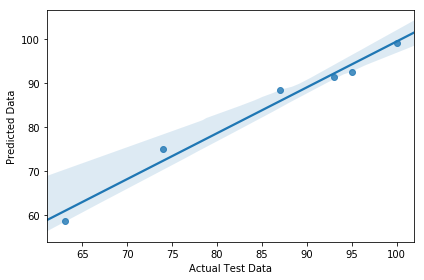

In [51]:
sns.regplot(Y_test,Y_pred)
plt.xlabel("Actual Test Data")
plt.ylabel("Predicted Data")
plt.tight_layout()

Here we analyse that the data points are very close to the best fit line. That means the residual is less.

## Saving model

In [52]:
import joblib
joblib.dump(Linear,'Baseeball_model.obj')

['Baseeball_model.obj']